In [2]:
import cloudComPy as cc
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
from rasterio.plot import show
import earthpy.plot as ep
import earthpy.spatial as es

In [5]:
cloud = cc.loadPointCloud("../../real_data/15_CotepatiereCocaliere/process/cropped_clouds/galets_comparison/M3C2.ply")

In [6]:
cloud.getScalarFieldDic()

{'M3C2 distance': 7,
 'Npoints cloud1': 1,
 'Npoints cloud2': 2,
 'STD cloud1': 3,
 'STD cloud2': 4,
 'distance uncertainty': 6,
 'normal scale': 0,
 'significant change': 5}

In [7]:
xyz = cloud.toNpArrayCopy()

In [8]:
ground_raster =  cc.RasterizeGeoTiffOnly(cloud, 
                                            gridStep= 0.1,
                                            vertDir=cc.CC_DIRECTION.Z,
                                            outputRasterZ=True,
                                            outputRasterSFs= True,
                                            pathToImages="../../../real_data/15_CotepatiereCocaliere/process/cropped_clouds/galets_comparison/",
                                            emptyCellFillStrategy=cc.EmptyCellFillOption.LEAVE_EMPTY)

In [10]:
src = rio.open("../../real_data/15_CotepatiereCocaliere/process/cropped_clouds/galets_comparison/M3C2 - Cloud_RASTER_Z_AND_SF.tif")

In [11]:
src.bounds.left

BoundingBox(left=-670.3777587890625, bottom=-159.19990997314454, right=-644.1777587890624, top=-123.59990997314453)

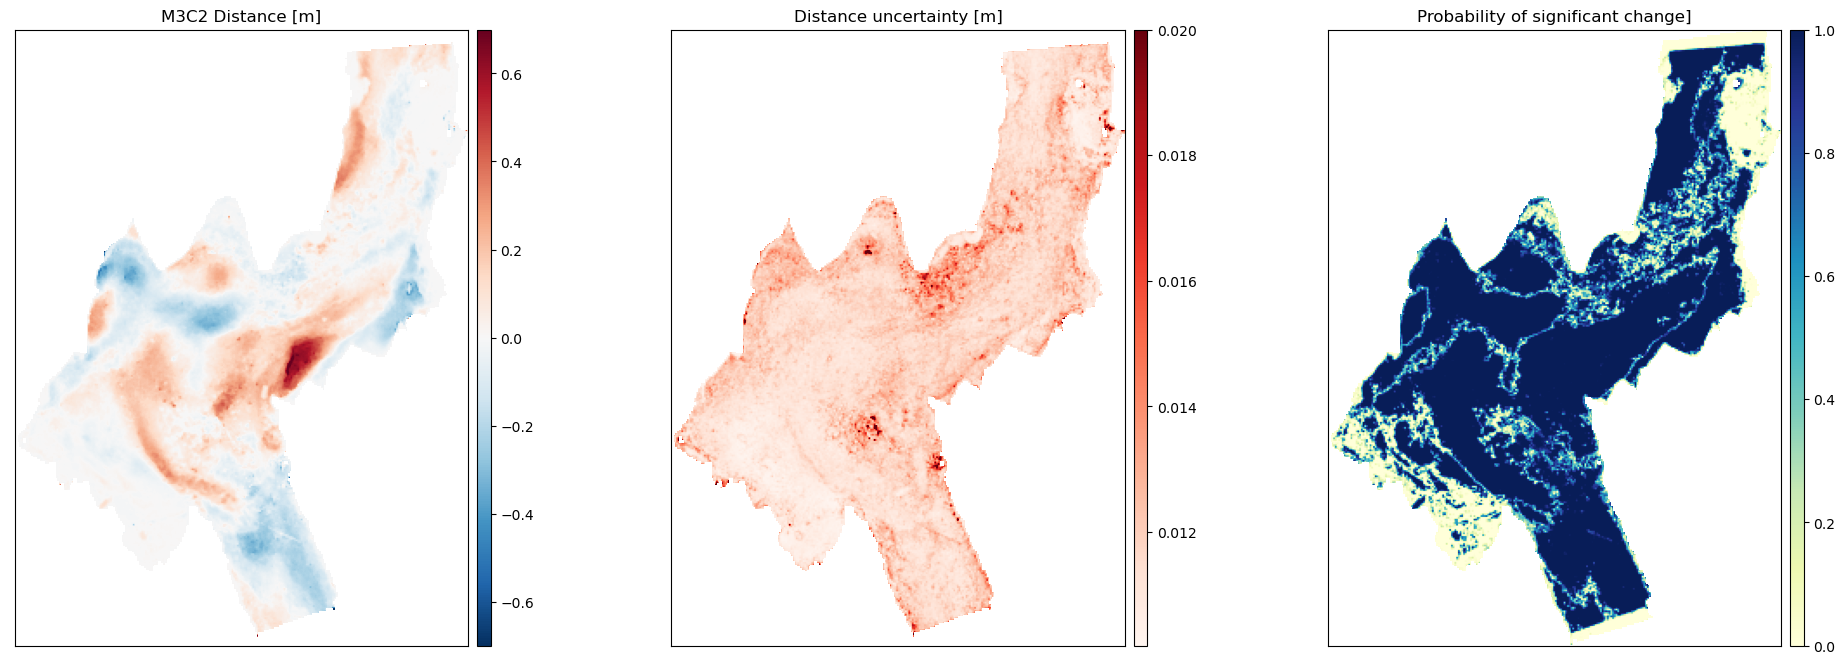

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

m3c2 = src.read(9)
ep.plot_bands(-m3c2, ax=ax1, cmap="RdBu_r", vmin=-0.7, vmax=0.7)
ax1.set_title("M3C2 Distance [m]")

dist_uncertainty= src.read(8)
ep.plot_bands(dist_uncertainty, ax=ax2, cmap="Reds", vmax=0.02)
ax2.set_title("Distance uncertainty [m]")

signif_change= src.read(7)

ep.plot_bands(signif_change, ax=ax3, cmap="YlGnBu")

ax3.set_title("Probability of significant change]")

plt.savefig("../../../real_data/15_CotepatiereCocaliere/process/cropped_clouds/galets_comparison/M3C2 summary.png", dpi = 300)

In [1]:
faro_hillshade =  rio.open("../../../real_data/15_CotepatiereCocaliere/process/cropped_clouds/galets_comparison/FARO_sol_raster_Archaeological_(VAT)_masked.tif")
blk2go_hillshade = rio.open("../../../real_data/15_CotepatiereCocaliere/process/cropped_clouds/galets_comparison/BLK2GO_sol_raster_krige_Archaeological_(VAT)_masked.tif")

NameError: name 'rio' is not defined

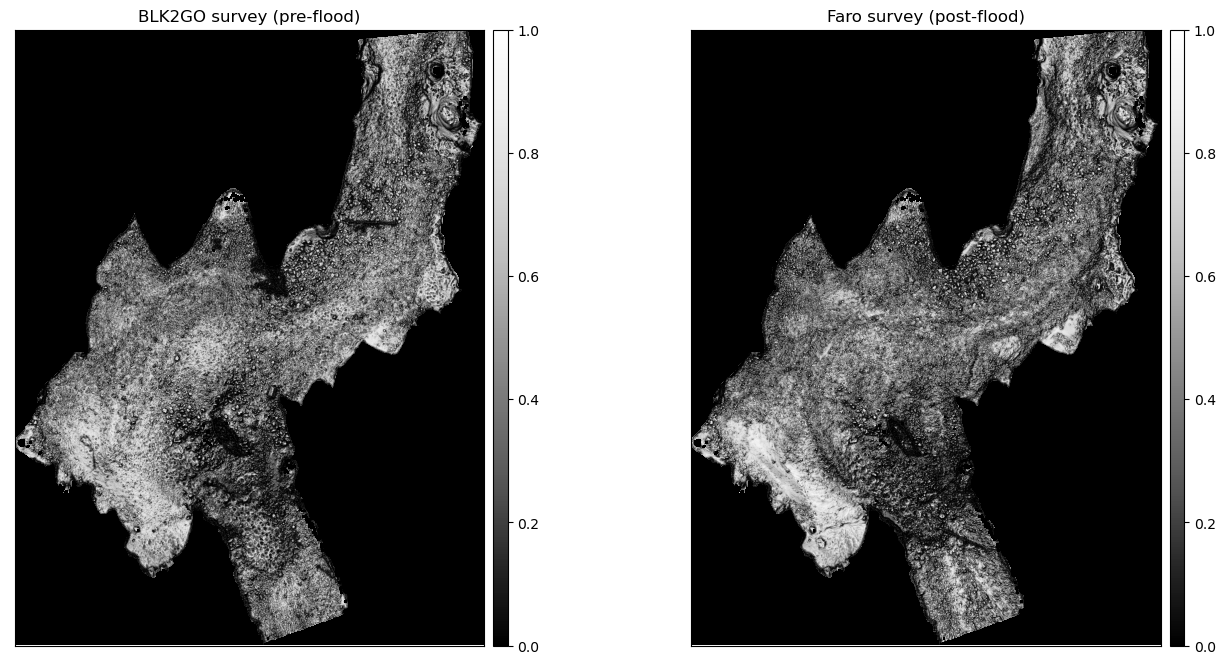

In [9]:
fig, (blk, faro) = plt.subplots(1, 2, figsize=(16, 8))
faro_hillshade_bd = faro_hillshade.read(1)
blk_hillshade_bd = blk2go_hillshade.read(1)

ep.plot_bands(faro_hillshade_bd, ax=faro, vmax = 1, vmin=0)
ep.plot_bands(blk_hillshade_bd, ax=blk, vmax = 1, vmin=0)

blk.set_title("BLK2GO survey (pre-flood)")
faro.set_title("Faro survey (post-flood)")

plt.savefig("../../../real_data/15_CotepatiereCocaliere/process/cropped_clouds/galets_comparison/BLk2GO_Faro_comparison.png", dpi = 300)

-0.28906020462848947 0.22960920621722392


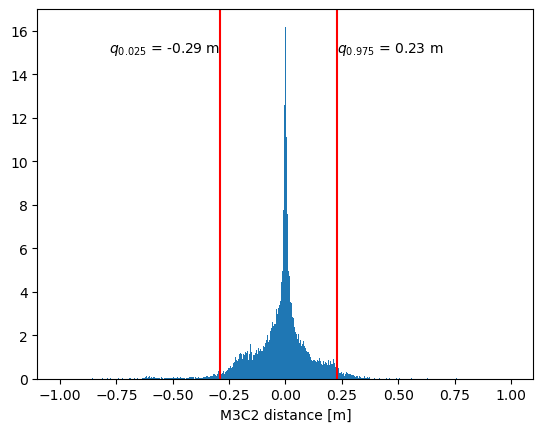

In [10]:
q025, q975 = np.quantile(m3c2.flatten()[~np.isnan(m3c2.flatten())], [0.025, 0.975])
fig, ax = plt.subplots()
print(q025, q975)
ax.hist(m3c2.flatten(), bins = np.linspace(-1, 1, 1000), density = True);
ax.axvline(q025, color = "r")
ax.axvline(q975, color = "r")
ax.text(q025, 15, s=f"$q_{{0.025}}$ = {q025:.2f} m", ha = "right")
ax.text(q975, 15, s=f"$q_{{0.975}}$ = {q975:.2f} m", ha = "left")
ax.set_xlabel("M3C2 distance [m]")
plt.savefig("../../../real_data/15_CotepatiereCocaliere/process/cropped_clouds/galets_comparison/M3C2_distance_distribution.png", dpi = 300)